# Two Body Orbit
* Published on May 01, 2020 by **Dennis H. Calderon** (*dennis.henry.calderon@gmail.com*)
***

For a system with two orbiting masses $m_1$ and $m_2$ the Lagrangian is $\mathcal{L}=T-U$ where

$\begin{align}
 T &= \frac{1}{2} (\dot x_1^2 + \dot y_1^2) + \frac{1}{2} (\dot x_2^2 + \dot y_2^2) \\
 U &= \frac{-G m_1 m_2}{r}
\end{align}$
***
We need to solve Lagrange's equations for $x_1, y_1, x_2,$ and $y_2$.

$\begin{align}
 \ddot x_1 &= \frac{-G m_1 m_2}{r_{12}^2} \frac{x_1-x_2}{r_{12} m_1} \\
 \ddot y_1 &= \frac{-G m_1 m_2}{r_{12}^2} \frac{y_1-y_2}{r_{12} m_1} \\
 \ddot x_2 &= \frac{-G m_1 m_2}{r_{21}^2} \frac{x_2-x_1}{r_{21} m_2} \\
 \ddot y_2 &= \frac{-G m_1 m_2}{r_{21}^2} \frac{y_2-y_1}{r_{21} m_2}
\end{align}$

Where $r_{12}= r_{21} = \sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$.

Now we can solve numericallky

In [18]:
%matplotlib inline

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

In [20]:
class DoubleOrbit():
    """
    Description
    ======
    We will solve Lagrangian for double oribit system
    
    Parameters
    =======
    m1 : mass of the first orbital body
    m2 : mass of the second prbital body
    G: gravitational constant

    Methods
    ======
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
        
    """
    def __init__(self, m1, m2, G):
        self.m1 = m1
        self.m2 = m2
        self.G = G
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dx1/dt d^2x1/dt^2 dy1/dt d^2y1/dt^2 dx2/dt d^2x2/dt^2 dy2/dt d^2y2/dt^2]
        
        Parameters
        ======
        t: time
            
        y: 8-component vector with y[0] = x1, y[1] = x1_dot, y[2] = y1, y[3] = y1_dot, 
            y[4] = x2, y[5] = x2_dot, y[6] = y2, y[7] = y2_dot
            
        """
        r = np.sqrt((y[0]-y[4])**2 + (y[2]-y[6])**2)
        F = -self.G*self.m1*self.m2/r**2
        
        return [y[1], F*(y[0]-y[4])/(self.m1*r), y[3], F*(y[2]-y[6])/(self.m1*r), 
                y[5], F*(y[4]-y[0])/(self.m2*r), y[7], F*(y[6]-y[2])/(self.m2*r)]
        
    def solve_ode(self, x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0,
                  t, abserr = 1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
         """
        
        y = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]
        
        solution = solve_ivp(self.dy_dt, (t[0], t[-1]), y, t_eval=t, rtol=relerr, atol=abserr, method= 'RK23')
                        
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = solution.y
        
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot  
        
        

In [21]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

# Gravitational System

In [24]:
# setup masses
G = 1.
m1 = 10.
m2 = 10.

# Initial conditions
x1_0=-3.5
x1_dot_0 = -0.5
y1_0= 0.
y1_dot_0 = 1.
x2_0= 1.5
x2_dot_0 = -(m1/m2)*x1_dot_0
y2_0= -1.5
y2_dot_0 = -(m1/m2)*y1_dot_0

# Iinitialize orit
DO1 = DoubleOrbit(m1=m1, m2=m2, G=G)

In [25]:
#time
t_start = 0.
t_end = 100.
delta_t = 0.0001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# find motions
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = DO1.solve_ode(x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, 
                                                              x2_dot_0, y2_0, y2_dot_0, t_pts)

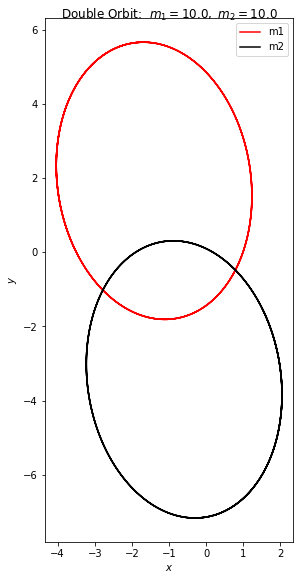

In [26]:
# plot
fig_1 = plt.figure(figsize=(8,8))

overall_title = 'Double Orbit: ' + \
                rf' $m_1 = {DO.m1},$' + \
                rf' $m_2 = {DO.m2}$'
fig_1.suptitle(overall_title, va='baseline')

ax_1 = fig_1.add_subplot(1,1,1)
ax_1.plot(x1, y1, color='red', label='m1')
ax_1.plot(x2, y2, color='black', label='m2')
ax_1.set_xlabel(r'$x$')
ax_1.set_ylabel(r'$y$')
ax_1.set_aspect('equal')
ax_1.legend()


fig_1.tight_layout()
fig_1.savefig('DoubleOrbits.png', dpi = 600, bbox_inches='tight')  # always bbox_inches='tight

we see that the two masses orbit each other in elliptiacal paths.

## Now we will have a large mass

Let us have  $m_1>>m_2$.

In [27]:
# setup masses
G = 1.
m1 = 1000.
m2 = 10.

# Initial conditions
x1_dot_0 = 0.002
y1_0= 0.
y1_dot_0 = 0.1
x2_0= 1.5
x2_dot_0 = -(m1/m2)*x1_dot_0
y2_0= -2.5
y2_dot_0 = -(m1/m2)*y1_dot_0

# initialize orbit
DO2 = DoubleOrbit(m1=m1, m2=m2, G=G)

In [28]:
# time
t_start = 0.
t_end = 20.
delta_t = 0.0001

t_pts = np.arange(t_start, t_end+delta_t, delta_t) 

# Find the motions
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = DO2.solve_ode(x1_0, x1_dot_0, y1_0, y1_dot_0, 
                              x2_0, x2_dot_0, y2_0, y2_dot_0, t_pts)

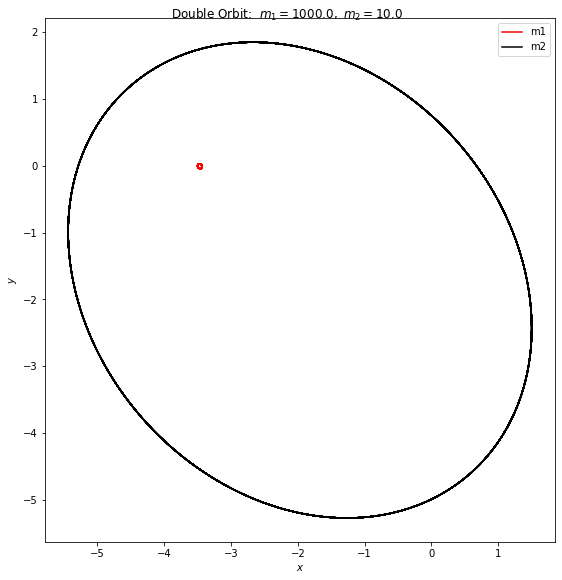

In [29]:
# Plot 
fig_2 = plt.figure(figsize=(8,8))

overall_title = 'Double Orbit: ' + \
                rf' $m_1 = {DO2.m1},$' + \
                rf' $m_2 = {DO2.m2}$'
fig_2.suptitle(overall_title, va='baseline')

start, stop = start_stop_indices(t_pts, 0., 20.) 
ax_2 = fig_2.add_subplot(1,1,1)
ax_2.plot(x1[start: stop], y1[start: stop], color='red', label='m1')
ax_2.plot(x2[start: stop], y2[start: stop], color='black', label='m2')
ax_2.set_xlabel(r'$x$')
ax_2.set_ylabel(r'$y$')
ax_2.set_aspect('equal')
ax_2.legend()


fig_2.tight_layout()
fig_2.savefig('DoubleOrbits_Large_m1.png', dpi = 600, bbox_inches='tight')

We can see that $m_1$ stays pretty much stationary. This is what we expect for 
am $m_1>>m_2$